# LAB 1

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
## Start by loading necessary libraries
##########

#Load the libraries
import matplotlib.pyplot as plt
import numpy as np


#load MLPCLassifier model
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import confusion_matrix


Multilayer Perceptron for Classification


Let us use Scikit-Learn to make a simple MLP for binary classification.

- Your job will be to use the `MLPClassifier` to classify hand-written digits as 5 or not-5 (i.e., any of the other 0,1,...,9).

- Having trained the classifier, you will need to report the confusion matrix, basic performance metrics, and generate ROC and Precision-Recall Curves

Run the following cell, **with appropriate modification**, to download the MNIST numbers dataset to a directory of your choice.

Run the cell after to load and convert the data to numpy arrays.

In [3]:
#You'll need the torchvision package:
from torchvision.datasets import MNIST

#Also, we'll want to transform ToTensor:
from torchvision.transforms import ToTensor

## Get the training and test sets
## We download data into a new MNIST_data folder (if already there, we load from this folder)
## Change the root directory to whatever you want

mnist_trainset = MNIST(root='./MNIST_data', train=True, download=True, transform=ToTensor())

mnist_testset = MNIST(root='./MNIST_data', train=False, download=True, transform=ToTensor())

In [4]:
len(mnist_trainset)

60000

In [5]:
type(mnist_trainset[0])

tuple

In [6]:
type(mnist_trainset[0][0]), type(mnist_trainset[0][1])

(torch.Tensor, int)

In [7]:
#shape of the 1st entry of the tuple mnist_trainset[0]
mnist_trainset[0][0].shape

torch.Size([1, 28, 28])

In [8]:
mnist_trainset[0][0].squeeze().shape

torch.Size([28, 28])

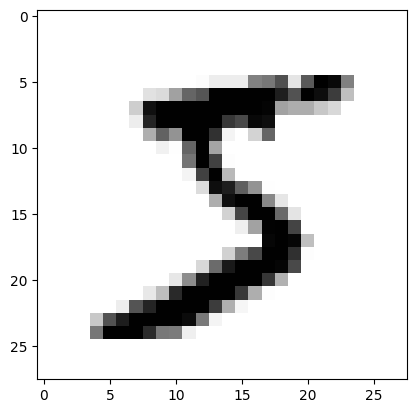

In [9]:

plt.imshow(mnist_trainset[0][0].squeeze(), cmap='gray_r')  #gray reverse

In [10]:
#the second entry of the tuple mnist_trainset[0] is the true output/label (y=5)
mnist_trainset[0][1]

5

In [11]:
#Run this cell to put the PyTorch DataSets into simple numpy:
#########

#Preallocate our training and testing numpy arrays:
#Note that our input data is the form of 28x28 digits
X_train = np.zeros([60000, 28, 28])
y_train = np.zeros([60000])

X_test = np.zeros([10000, 28, 28])
y_test = np.zeros([10000])

# Run these loops to build X_train, y_train:
for index, (i,j) in enumerate(mnist_trainset):
    X_train[index, :] = i.numpy()
    y_train[index] = j
    
#And X_test, y_test
for index, (i,j) in enumerate(mnist_testset):
    X_test[index, :] = i.numpy()
    y_test[index] = j

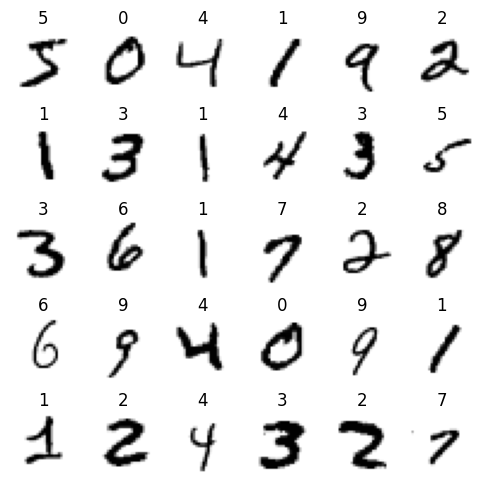

In [12]:
## Finally, run this to plot the first 30 digits, confirming everything went okay
########

fig1, ax1 = plt.subplots(5, 6, figsize=(6,6))

#Flatten for easier indexing
ax1 = ax1.flatten()

#And plot:
for i in range(30):

    #Plot
    im = ax1[i].imshow(X_train[i], cmap='gray_r')
    
    #Report number category
    ax1[i].set_title(int(y_train[i]), y=.925)
    ax1[i].set_axis_off()

In [13]:
print(X_train.shape, X_test.shape)

type(X_train), type(X_test)

(60000, 28, 28) (10000, 28, 28)


(numpy.ndarray, numpy.ndarray)

<br>

So, `X_train` is is a numpy ndarray (i.e. tensor) of shape $60,000 \times 28 \times 28$. That is, it consists of 60,000 images of 28x28 (=784) pixels.  <br>

Similarly, X_test consists of 10,000 images of 28x28 pixels.

<br>

### Part 1: Binary Classification: 5 vs. Not-5

1. Construct new target variables:

- `y_train_5`: This should be indicator of number 5 on the image. That is, `y_train_5` should take value $1$ if the label is `5`, and $0$ if the label is any other digit (i.e. if it is NOT `5`).
Hint: Use `y_train==5` mask vector and convert its entries into `np.float32` using `astype()` method.

- `y_test_5`: This should be the analog of `y_train_5`, i.e. the indicator of number 5, but among test images.

2. Flatten the input arrays:

- Create ndarray (i.e. tensor) `X_train_flat` from `X_train` by reshaping it into tensor (i.e. np.ndarray) of shape $60,000\times 784$ ). Apply .reshape() method: `X_train.reshape(-1,784)`. 

- Similarly, create ndarray `X_test_flat` by reshaping `X_test` into $10,000 \times 784$ ndarrao.

- Use `type()` function and `shape` attribute to check that `X_train_flat` and `X_test_flat` are indeed numpy ndarrays and that they are of the correct shape.

3. Construct an object with name `mlp_clf`, which is an `MLPClassifier` model with the following structural parameters:

- Use three hidden layers, each of size 32 (this should be specified as a list with number of neurons in each layer
- Use the `ReLU` activation function
- Set `alpha = 0` (note: `alpha` is the strength of the $L^2$ regularization; so we do it without ($L^2$) regularization
- Set  `max_iter`, the maximum number of epochs/iterations, to 2
- Set batch size to 256


Your code should look something like the following (with appropriate changes):

```

mlp_clf = MLPClassifier(hidden_layer_sizes=[?,?,?], 
                        random_state=42, activation=???,
                        alpha=??, max_iter=??, batch_size=??,
                        n_iter_no_change=10000000, #max num of iter > tol
                        warm_start=True)
```


4. Finally, train/fit the model on the training data `X_train_flat`, `y_train_5`.


In [14]:
 ## Fill in, use as many cells as you need
y_train_5 = (y_train==5).astype(np.float32)
y_test_5 = (y_test==5).astype(np.float32)

In [15]:
X_train_flat = X_train.reshape(-1, 784)
X_test_flat = X_test.reshape(-1, 784)
type(X_train_flat), type(X_test_flat)

(numpy.ndarray, numpy.ndarray)

In [16]:
#checking whether everything is ok
type(X_train_flat)
X_train_flat.shape

(60000, 784)

In [17]:

mlp_clf = MLPClassifier(hidden_layer_sizes=[32, 32, 32], random_state=42, activation='relu',
                       alpha=0, max_iter=2, batch_size=256,
                       n_iter_no_change=1000000, #can force overfitting
                       warm_start=True)


In [18]:
mlp_clf.fit(X_train_flat, y_train_5)


MLPClassifier(alpha=0, batch_size=256, hidden_layer_sizes=[32, 32, 32],
              max_iter=2, n_iter_no_change=1000000, random_state=42,
              warm_start=True)

### Checking Performance (5 vs. non-5 model)

**Now, use your trained model, generate predictions on both the training and testing data, and report the following, for the *testing* dataset:**

1. Confusion Matrix
2. Accuracy
3. No information rate (NIR)
4. Sensitivity (Recall)
5. Positive Predictive Value (Precision)


If everything is okay, (and if you used `random_state=42`), you should have the following performance on the ***test*** data.

1. Confusion Matrix

 $$
\begin{bmatrix}
9038 & 70 \\
37 & 855
\end{bmatrix}
$$

2. Accuracy $=0.9893$
3. Sensitivity (Recall) = TP / (TP + FN) $=0.9585$
4. Positive Predictive Value (Precision) = TP / (TP + FP) $=0.9243$


In [ ]:
 ## Fill in, use as many cells as you need

In [19]:
## estimated probabilities for training data (useful for ROC curve)
class1_prob_train = mlp_clf.predict_proba(X_train_flat)[:,1]

## estimated probabilities for test data (useful for ROC curve)
class1_prob_test = mlp_clf.predict_proba(X_test_flat)[:,1]


In [20]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

## And predict for mlp_clf model on test set:
y_pred = mlp_clf.predict(X_test_flat)

#confusion matrix
cm = confusion_matrix(y_test_5, y_pred)

#accuracy score (call it acc)

acc = accuracy_score(y_test_5, y_pred)

#sensitivity/recall =  TP / (TP + FN) (call it sensitivity)

sensitivity = recall_score(y_test_5, y_pred)

#ppv/precision =  TP / (TP + FP)  (call it ppv)

ppv = precision_score(y_test_5, y_pred)

print(cm)
print(acc)
print(sensitivity)
print(ppv)

[[9038   70]
 [  37  855]]
0.9893
0.9585201793721974
0.9243243243243243


In [21]:
## And predict for mlp_clf model on training set: (call the vector y_pred)
y_pred = mlp_clf.predict(X_train_flat)

#confusion matrix
cm = confusion_matrix(y_train_5, y_pred)

#accuracy score (call it acc)

acc = accuracy_score(y_train_5, y_pred)

#sensitivity/recall =  TP / (TP + FN) (call it sensitivity)

sensitivity = recall_score(y_train_5, y_pred)

#ppv/precision =  TP / (TP + FP)  (call it ppv)

ppv = precision_score(y_train_5, y_pred)

print(cm)
print(acc)
print(sensitivity)
print(ppv)

[[54156   423]
 [  166  5255]]
0.9901833333333333
0.9693783434790629
0.9255019373018668


### ROC and Precision-Recall Curves

Generate ROC and Precision-Recall curves for your 5 vs. not-5 classifier for **both** the training and testing sets.

In fact, you are already given the entire code for the plots, just replace "??" wherever needed.

Your curves should resemble the following:

<img src="ROC-5-vs-not-5.png" alt="ROC curve missing">

In [24]:
 ## Fill in, use as many cells as you need

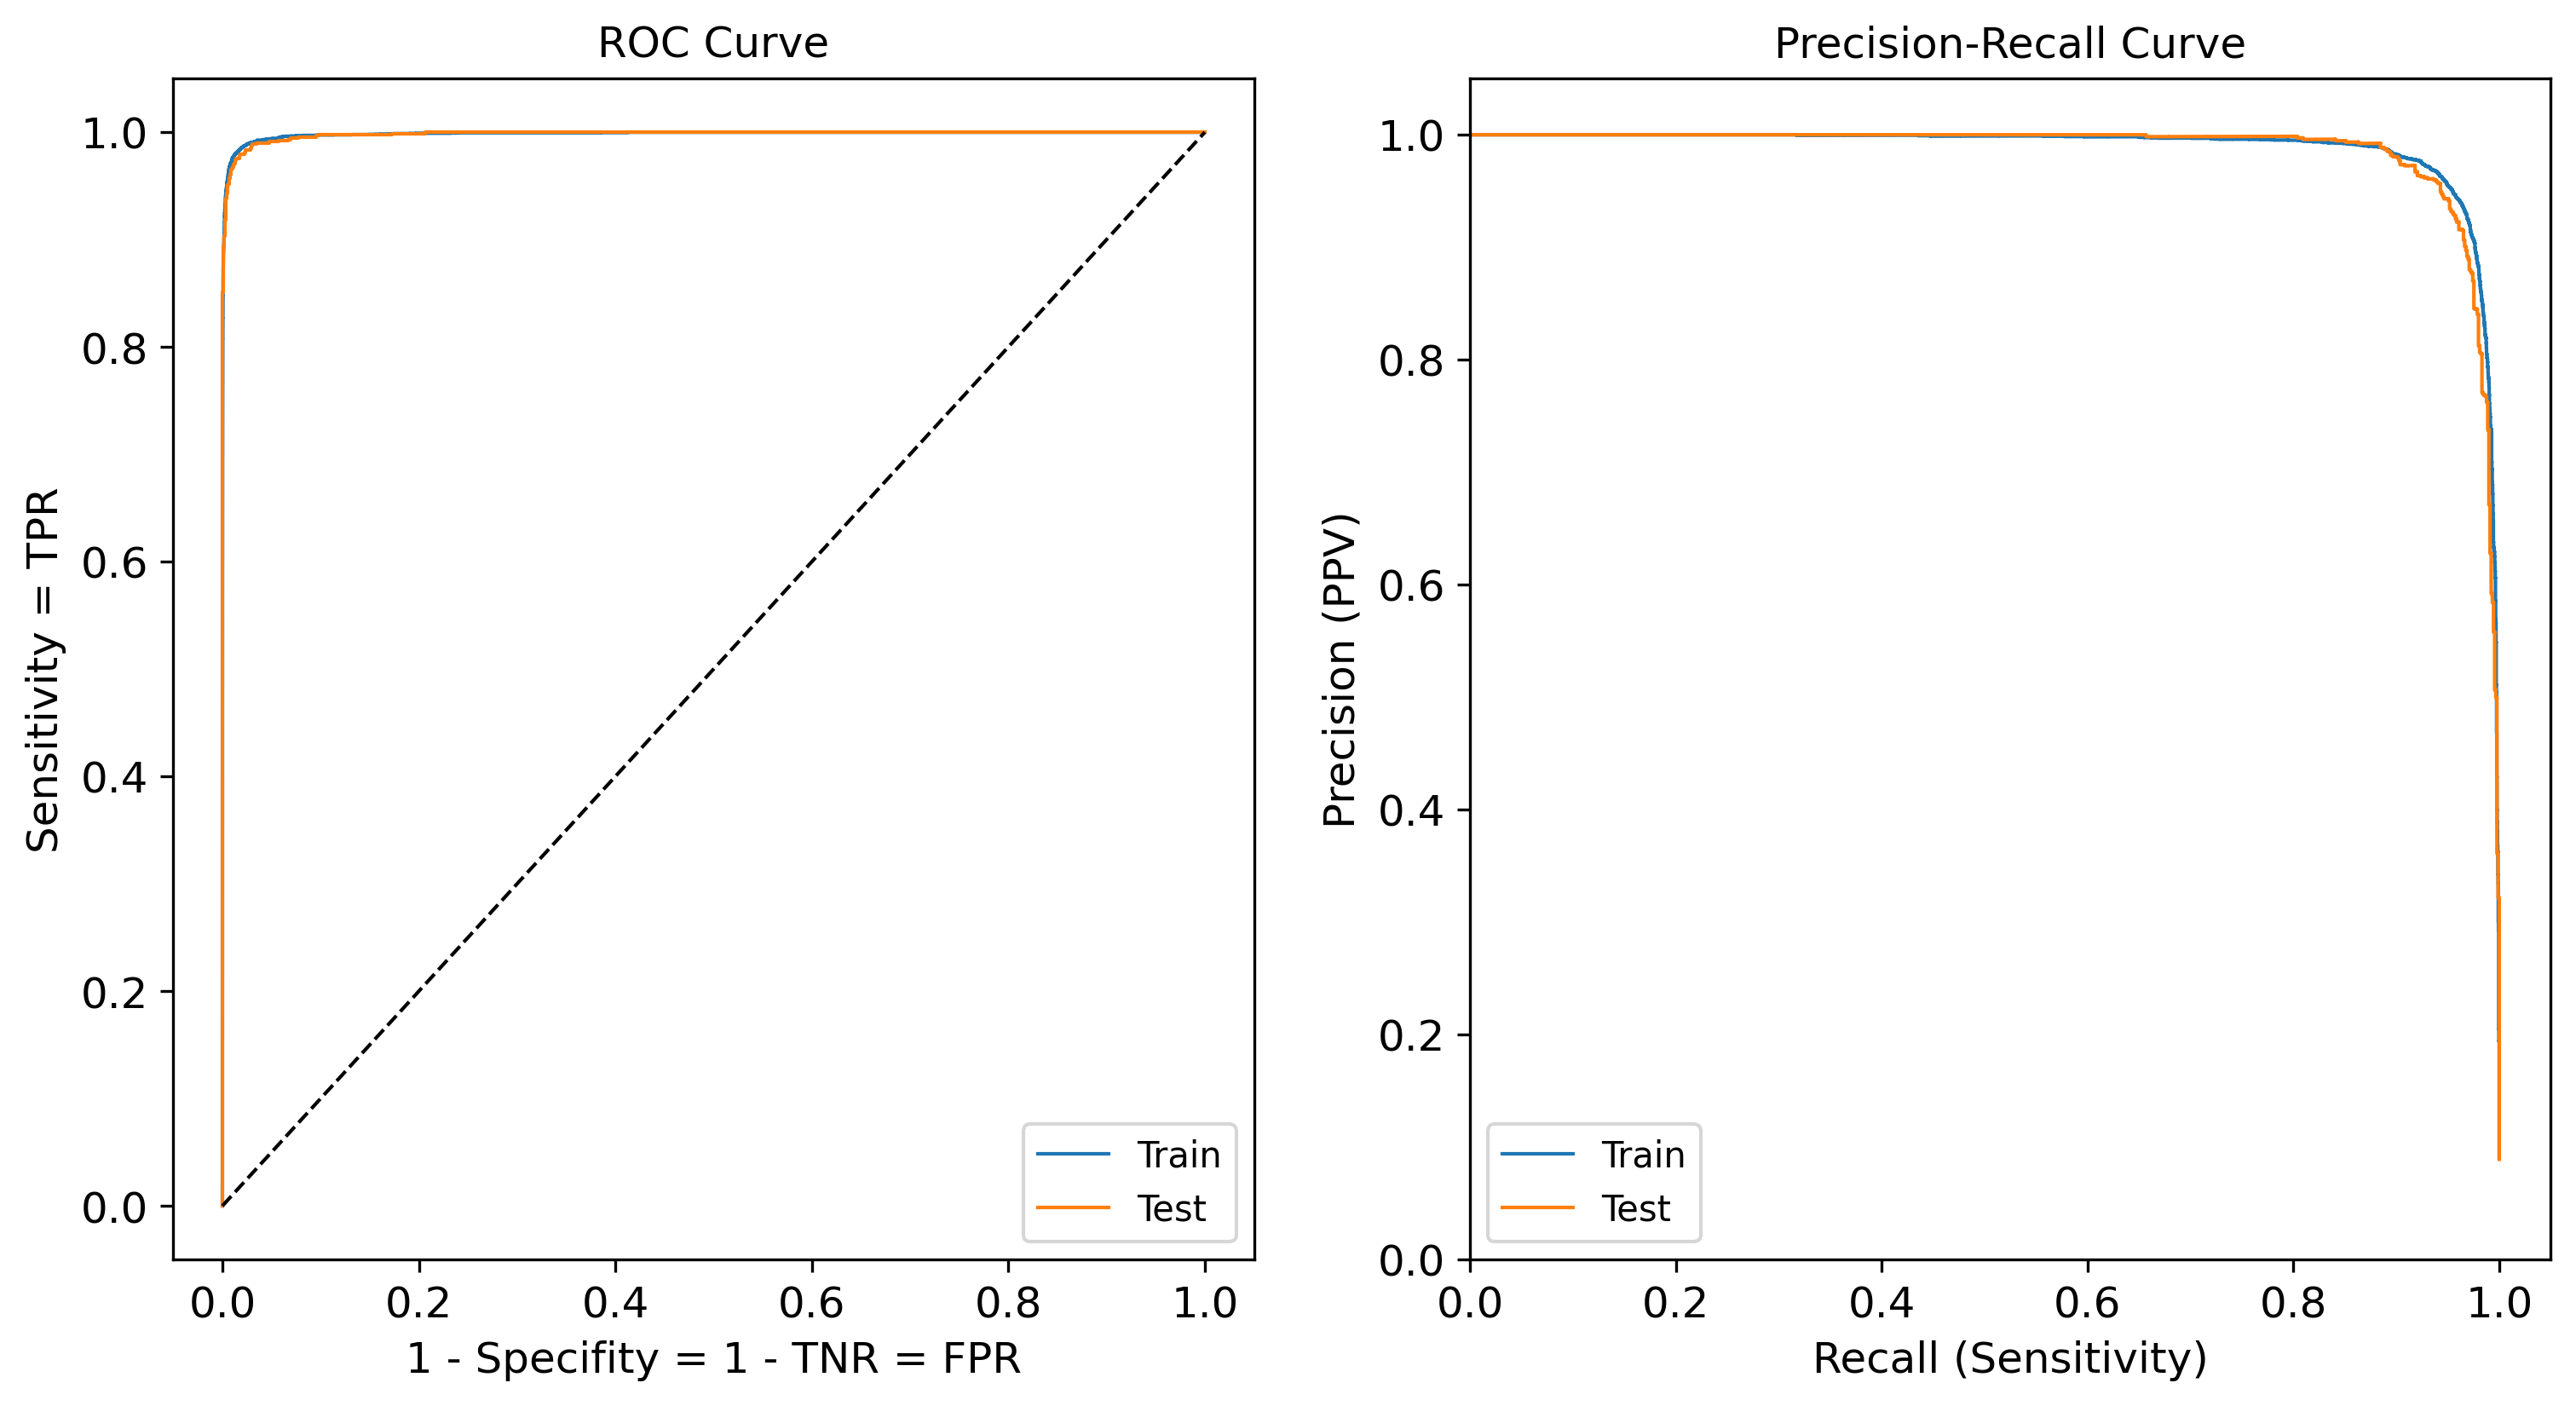

In [25]:
from sklearn.metrics import roc_curve

#FPR is 1 - TNR   (use this for ROC curves for train and test data)
FPR_train, TPR_train, thresholds_train = roc_curve(y_train_5, class1_prob_train)
FPR_test, TPR_test, thresholds_test = roc_curve(y_test_5, class1_prob_test)


#Plot ROC Curves - just replace ??
#############

fig1, ax1 = plt.subplots(1, 2, figsize=(12,6), dpi=300)

ax1[0].step(FPR_train, TPR_train, linewidth=1, label='Train')
ax1[0].step(FPR_test, TPR_test, linewidth=1, label='Test')

ax1[0].legend()

#Chance alone:
ax1[0].plot([0,1], [0,1], '--', linewidth=1, color = 'black')


#Labels, etc.
fs = 12
ax1[0].set_xlabel('1 - Specifity = 1 - TNR = FPR', fontsize=fs)
ax1[0].set_ylabel('Sensitivity = TPR', fontsize=fs)
ax1[0].tick_params(axis='both', labelsize=fs)

ax1[0].set_title('ROC Curve');


#and here we plot precision-recall curve - just replace ??
############

from sklearn.metrics import precision_recall_curve

precisions_train, recalls_train, thresholds_train = precision_recall_curve(y_train_5, class1_prob_train)
precisions_test, recalls_test, thresholds_test = precision_recall_curve(y_test_5, class1_prob_test)

#Plot Precision-Recall Curves
#############

ax1[1].step(recalls_train, precisions_train, linewidth=1, label='Train')
ax1[1].step(recalls_test, precisions_test, linewidth=1, label='Test')

ax1[1].legend()


#Axis labels, etc.
fs = 12
ax1[1].set_xlabel('Recall (Sensitivity)', fontsize=fs)
ax1[1].set_ylabel('Precision (PPV)', fontsize=fs)
ax1[1].tick_params(axis='both', labelsize=fs)

ax1[1].set_title('Precision-Recall Curve')
ax1[1].set_ylim([0, 1.05])
ax1[1].set_xlim([0, 1.05]);



### Part 2. Multi-Class Classification: All MNIST Number Classes

Now, train one more `MLPClassifier` model that is a multiclassifier. Call this model `mlp_multiclf`. Model specification:

- Three hidden layers with 64 neurons each
- Maximum number of training iterations/epochs equal to 2
- batch size of 128
- `alpha = 0`

For the model `mlp_multiclf`, simply try to predict the digit category from the input.

**Report the overall accuracy and NIR (no information rate, i.e. the proportion of appearance of the category/number with the highest frequency).**

**Report the confusion matrix on the test data. If you set random_state=42, you should get the following matrix:** 


```
array([[ 966,    0,    1,    2,    0,    3,    2,    3,    1,    2],
       [   0, 1117,    4,    1,    0,    1,    4,    2,    6,    0],
       [   4,    1,  998,    5,    1,    1,    2,   12,    6,    2],
       [   0,    0,    9,  966,    1,    7,    0,   15,    5,    7],
       [   1,    0,    7,    0,  930,    0,    3,    3,    2,   36],
       [   6,    1,    1,   25,    4,  824,    8,    5,    9,    9],
       [   9,    3,    1,    2,    5,    8,  925,    0,    5,    0],
       [   0,    6,   12,    1,    0,    1,    0,  998,    1,    9],
       [   7,    0,    6,   12,    8,    5,    3,   18,  892,   23],
       [   4,    5,    0,    6,   15,    2,    0,   23,    1,  953]],
      dtype=int64)
```

<br>

**Try to identify any trends in misclassifications. *For example, what number does the model most commonly misclassify 9s as?***

In [26]:
#create mlp_multiclf model
mlp_multiclf = MLPClassifier(hidden_layer_sizes=[64, 64, 64], random_state=42, activation='relu',
                             alpha=0, max_iter=2, batch_size=128,
                             n_iter_no_change=1000000,
                             warm_start=True)

In [27]:
#fit mlp_multiclf on the training data
mlp_multiclf.fit(X_train_flat, y_train)

MLPClassifier(alpha=0, batch_size=128, hidden_layer_sizes=[64, 64, 64],
              max_iter=2, n_iter_no_change=1000000, random_state=42,
              warm_start=True)

In [35]:
## And predict for mlp_multiclf on test set:
y_pred = mlp_multiclf.predict(X_test_flat)

#accuracy (call it acc)
acc = accuracy_score(y_test, y_pred)

#computing nir (no information rate)
def nir_score(test_set):
    unique, count = np.unique(test_set, return_counts=True)
    max_cls = max(count)
    nir = max_cls/len(test_set)
    print(unique)
    print(count)
    print(len(test_set))
    return nir

nir = nir_score(y_test)
print('Accuracy score:', acc)
print('No information rate:', nir)

[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
[ 980 1135 1032 1010  982  892  958 1028  974 1009]
10000
Accuracy score: 0.9569
No information rate: 0.1135


In [34]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred)

print(cm)

[[ 966    0    1    2    0    3    2    3    1    2]
 [   0 1117    4    1    0    1    4    2    6    0]
 [   4    1  998    5    1    1    2   12    6    2]
 [   0    0    9  966    1    7    0   15    5    7]
 [   1    0    7    0  930    0    3    3    2   36]
 [   6    1    1   25    4  824    8    5    9    9]
 [   9    3    1    2    5    8  925    0    5    0]
 [   0    6   12    1    0    1    0  998    1    9]
 [   7    0    6   12    8    5    3   18  892   23]
 [   4    5    0    6   15    2    0   23    1  953]]


In [51]:
def false_cls(y_test, y_pred):
    dict_counts = {x:0 for x in range(10)}
    mscls = [dict_counts.copy() for _ in range(10)]
    for i in range(len(y_test)):
        if y_test[i] != y_pred[i]:
            true_label = int(y_test[i])
            pred_label = int(y_pred[i])
            mscls[true_label - 1][pred_label] += 1
    return mscls

mscls = false_cls(y_test, y_pred)

for true_label, miscounts in enumerate(mscls):
    total = sum(miscounts.values())
    
    if total == 0:
        print(f"Number {true_label} was never misclassified.")
    else:
        most_common_pred, count = max(miscounts.items(), key=lambda x: x[1])
        print(f"Number {true_label} is most frequently misclassified as {most_common_pred} ({count} times).")

Number 0 is most frequently misclassified as 8 (6 times).
Number 1 is most frequently misclassified as 7 (12 times).
Number 2 is most frequently misclassified as 7 (15 times).
Number 3 is most frequently misclassified as 9 (36 times).
Number 4 is most frequently misclassified as 3 (25 times).
Number 5 is most frequently misclassified as 0 (9 times).
Number 6 is most frequently misclassified as 2 (12 times).
Number 7 is most frequently misclassified as 9 (23 times).
Number 8 is most frequently misclassified as 7 (23 times).
Number 9 is most frequently misclassified as 5 (3 times).
